<h1 style="border: 1px solid black; border-radius: 20px; text-align: center; padding : 10px;">
    
    Élégance et Stratégie : Maximiser les Conversions de Clients Passifs en Prêts Personnels

</h1>


# Context 

Ce dossier concerne une banque (Thera Bank) qui possède une clientèle croissante. La majorité de ces clients sont des clients passifs (déposants) avec des montants de dépôts variables. Le nombre de clients emprunteurs (actifs) est assez faible, et la banque souhaite développer cette base rapidement pour attirer plus d'activités de prêt et ainsi, générer davantage de revenus grâce aux intérêts sur les prêts. En particulier, la direction souhaite explorer des moyens de convertir ses clients passifs en clients de prêts personnels (tout en les conservant en tant que déposants). Une campagne menée par la banque l'année dernière auprès des clients passifs a montré un taux de conversion sain de plus de 9% de réussite. Cela a encouragé le département du marketing de détail à concevoir des campagnes pour cibler mieux le marketing afin d'augmenter le taux de réussite avec un budget minimal.

Le département souhaite construire un modèle qui les aidera à identifier les clients potentiels ayant une probabilité plus élevée d'acheter le prêt. Cela augmentera le taux de réussite tout en réduisant le coût de la campagne.

dataset source : https://www.kaggle.com/datasets/itsmesunil/bank-loan-modelling

# 1 Importation

In [1]:
## 1.1 Importation des bibliotheques

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
# On verifier que les bibliotheques sont importes
print('Pandas version: ',pd.__version__)
print('NumPy version: ',np.__version__)
print("Seaborn version:", sns.__version__)
print("Matplotlib version: ", plt.matplotlib.__version__)


Pandas version:  2.0.3
NumPy version:  1.24.3
Seaborn version: 0.12.2
Matplotlib version:  3.7.2


## 1.2 Importation des donnees 

In [4]:
df = pd.read_csv('bank_personal_loan.csv', delimiter=';')

In [5]:
df.sample()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
1147,1148,37,13,111,91367,1,0.8,2,0,0,0,0,0,0


## 1.3 Dictionnaire de dataset

- **Customer ID** : Numéro d'identification unique attribué à chaque client.
- **Age** : Âge du client en années complètes.
- **Experience** : Nombre d'années d'expérience professionnelle.
- **Income** : Revenu annuel du client en milliers de dollars.
- **ZIPCode** : Code postal de l'adresse domicile du client.
- **Family** : Nombre de membres dans la famille du client.
- **CCAvg** : Dépense mensuelle moyenne sur les cartes de crédit en milliers de dollars.
- **Education** : Niveau d'éducation atteint par le client. (1 : Licence ; 2 : Diplômé ; 3 : Avancé/Professionnel)
- **Mortgage** : Valeur de l'hypothèque de la maison du client, le cas échéant, en milliers de dollars.
- **Personal Loan** : Indique si le client a accepté le prêt personnel proposé lors de la dernière campagne. (Oui/Non)
- **Securities Account** : Indique si le client possède un compte de valeurs mobilières auprès de la banque. (Oui/Non)
- **CD Account** : Indique si le client possède un compte de dépôt à terme (CD) auprès de la banque. (Oui/Non)
- **Online** : Indique si le client utilise les services de banque en ligne. (Oui/Non)
- **CreditCard** : Indique si le client utilise une carte de crédit émise par UniversalBank. (Oui/Non)

## 1.4 Parametres global

In [6]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
palettes = ['viridis', 'magma', 'plasma', 'inferno', 'twilight', 'twilight_shifted', 'cool', 'coolwarm', 'cividis', 'spring',
            'summer', 'autumn', 'winter', 'bone', 'copper', 'pink', 'spring_r', 'summer_r', 'autumn_r', 'winter_r',
            'PuBu', 'PuBuGn', 'BuPu', 'RdPu', 'PuRd', 'Oranges', 'YlOrBr', 'YlOrRd', 'OrRd', 'RdOrYl', 'YlGn', 'YlGnBu',
            'GnBu', 'BuGn', 'PuOr', 'BrBG', 'PRGn', 'PiYG', 'RdGy', 'RdBu', 'RdYlBu', 'RdYlGn', 'Spectral', 'cubehelix',
            'husl', 'husl_r', 'hls', 'hls_r', 'gist_ncar', 'gist_ncar_r']
colors = ['#003049', '#D62828', '#F77F00', '#FCBF49', '#EAE2B7']

# 2. Etude des donnees 

## 2.1 df.head(), df.tail() et df.sample()

La commande df.head() permet de recuperer par default les 5 premiers lignes, si on veut recuperer les n derniers lignes, on utilise la commande df.tail(n) 

La commande sample() permet de recuperer par default un example aleatoire de notre dataset, on peut aussi specifier le nombre des observations a recuperer 

In [7]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [8]:
df.tail()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


In [9]:
df.sample(3)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
2219,2220,52,22,58,93101,4,2.0,3,223,0,0,0,1,0
2440,2441,31,5,22,91401,1,0.6,3,0,0,0,0,0,0
737,738,64,37,138,94709,2,2.8,2,0,1,0,0,1,0


## 2.2 Structure des nos donnees 

La commande df.info() nous permet de s'informer de la structure generale de notre dataset, parmit les informations on a:
- Les types des donnees.
- Nombres des colonnes.
- Nombres des valuers manquants pour chaque colonnes.
- Nombre des lignes en total

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


Les remarques les plus importantes depuis cette fonction `info()`
- Le DataFrame contient un total de 5000 entrées.
- Il y a 14 colonnes au total.
- Aucune des colonnes ne contient de valeurs nulles (non-null count est de 5000 pour toutes les colonnes), ce qui signifie qu'il n'y a pas de données manquantes dans le jeu de données.
- Les types de données des colonnes sont les suivants :
  - Les colonnes ID, Age, Experience, Income, ZIP Code, Family, Mortgage, Personal Loan, Securities Account, CD Account, Online et CreditCard sont de type entier (int64).
  - La colonne CCAvg est de type flottant (float64).

## 2.3 Donnees manquantes 

La fonction `isna()` est utilisée pour vérifier chaque élément du DataFrame et renvoie un DataFrame de la même forme, mais avec des valeurs booléennes indiquant True là où les valeurs sont NaN (Not a Number) et False là où les valeurs sont non-NaN.

Ensuite, la fonction `sum()` est appliquée à ce DataFrame résultant. Lorsque vous appelez `sum()` sur un DataFrame de valeurs booléennes, chaque valeur True est interprétée comme 1 et chaque valeur False est interprétée comme 0. Ainsi, `sum()` retourne la somme de ces valeurs, indiquant le nombre total de valeurs True pour chaque colonne.

In [11]:
df.isna().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

La sortie de `df.isna().sum()` indique le nombre de valeurs manquantes (NaN) dans chaque colonne du DataFrame. Dans ce cas précis :

- La colonne "ID" n'a aucune valeur manquante.
- De même, aucune des autres colonnes (`Age`, `Experience`, `Income`, `ZIP Code`, `Family`, `CCAvg`, `Education`, `Mortgage`, `Personal Loan`, `Securities Account`, `CD Account`, `Online`, `CreditCard`) n'a de valeurs manquantes.

Cela suggère que le jeu de données est complet, sans aucune valeur manquante dans toutes les colonnes.

## 2.4 Donnees dupliquer

La commande df.duplicated().sum() permet de calculer le nombre des entrees dupliquer dans notre dataset.

In [12]:
df.duplicated().sum()

0

    Cela suggere qu'on a aucun observation dupliquer dans notre dataset

# 3. Visualisation

La visualisation des données est cruciale pour comprendre la distribution et les relations entre les variables. Elle permet d'identifier des tendances et des corrélations, souvent invisibles dans les données brutes. La communication des découvertes est également facilitée par des graphiques et des diagrammes, permettant des décisions éclairées et des stratégies fondées sur une compréhension approfondie des données.


## 3.1 Répartition des tranches d'âge

In [25]:
# Creation d'une fonctions pour creer des tranches des ages
def age_tranche(df, decalage=10):
    '''
    Les tranches sont réparties selon un décalage de 10 ans par défaut
    '''
    # Calcul du nombre de tranches en fonction de l'âge maximal dans le DataFrame
    nb_tranches = int(np.ceil(df['Age'].max() / decalage))
    
    # Création d'un tableau d'entiers pour stocker le nombre d'âges dans chaque tranche
    tranches = np.zeros(nb_tranches, dtype=int)
    
    # Calcul du nombre d'âges dans chaque tranche
    for age in df['Age']:
        tranche_index = int(age / decalage)  # Calcul de l'indice de la tranche
        tranches[tranche_index] += 1         # Incrémentation du nombre d'âges dans la tranche
    
    return tranches

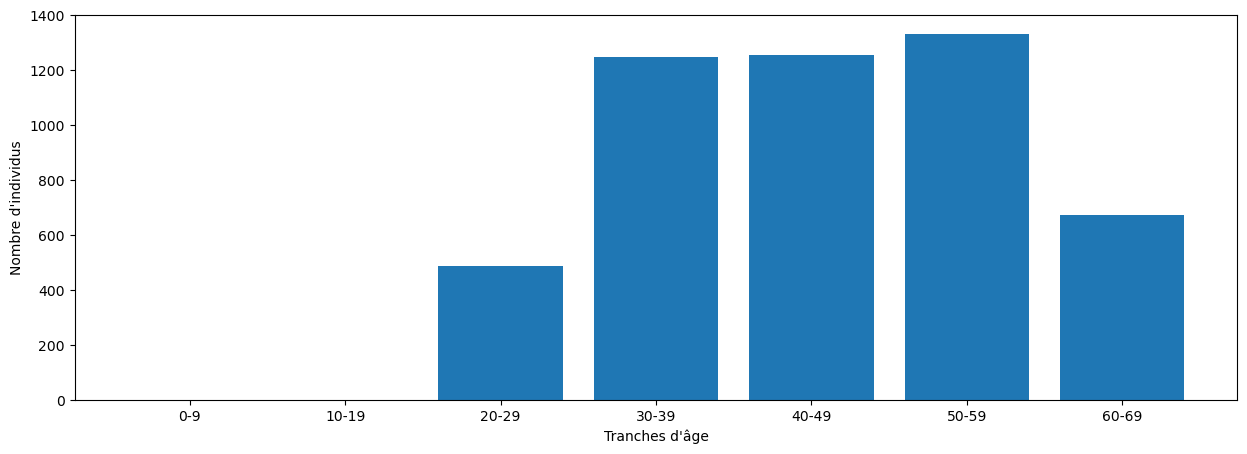

In [56]:
tranche = age_tranche(df)

# Tracé de l'histogramme
plt.figure(figsize=(15, 5))
plt.bar(range(len(tranche)), tranche)

plt.xlabel('Tranches d\'âge')
plt.ylabel('Nombre d\'individus')

plt.xticks(range(len(tranche)), [f'{i*10}-{(i+1)*10-1}' for i in range(len(tranche))])

# Affichage du graphique
plt.show()


In [ ]:
plt.figure(fige

<i>Remarques</i>
1. Les deux premiers groupes d'âge ne contiennent aucun individu (compte de 0). Cela suggère qu'il n'y a aucun individu dans le jeu de données dans la plage d'âge couverte par ces groupes.

2. Les groupes d'âge avec les comptes les plus élevés sont ceux correspondant aux âges de 20 à 29 ans, 30 à 39 ans et 40 à 49 ans. Cela indique que le jeu de données contient un nombre significatif d'individus dans ces tranches d'âge.

3. Les comptes diminuent progressivement à mesure que l'âge augmente au-delà de 40-49 ans. Cela est attendu car les gens ont tendance à prendre leur retraite ou à être moins représentés dans les groupes d'âge plus avancés.

4. On observe une légère augmentation à nouveau dans le compte pour le dernier groupe d'âge (70 à 79 ans). Cela pourrait être dû à des individus qui vivent plus longtemps ou qui restent actifs à un âge avancé.

5. Dans l'ensemble, la distribution semble être inclinée vers les groupes d'âge plus jeunes, avec une diminution des comptes pour les groupes d'âge plus âgés, ce qui est une tendance démographique courante dans de nombreuses populations.